0:	learn: 2.0588972	total: 135ms	remaining: 1m 7s
100:	learn: 1.5710913	total: 160ms	remaining: 630ms
200:	learn: 1.3340047	total: 178ms	remaining: 264ms
300:	learn: 1.0843792	total: 197ms	remaining: 130ms
400:	learn: 0.9314839	total: 217ms	remaining: 53.7ms
499:	learn: 0.8087020	total: 238ms	remaining: 0us
训练集 相关系数: 0.9387
测试集 相关系数: 0.3451


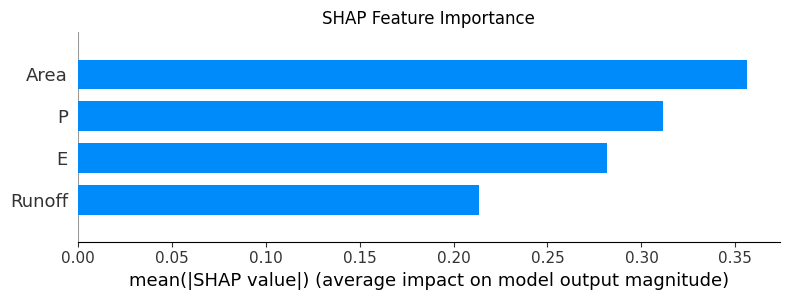

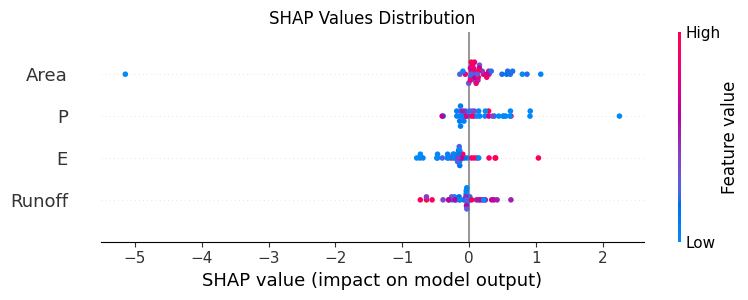

In [1]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 读取数据
df = pd.read_csv('data/machine_l.csv')

# 定义特征和目标变量
X = df[['Runoff', 'P', 'E', 'Area']]
y = df['LWSC']

# 划分训练集和测试集，比例为8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化CatBoost模型
model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=3,
    loss_function='RMSE',
    random_seed=42,
    verbose=100
)

# 训练模型
model.fit(X_train, y_train)

# 预测
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


train_corr, _ = pearsonr(y_train, y_pred_train)
test_corr, _ = pearsonr(y_test, y_pred_test)


print(f'训练集 相关系数: {train_corr:.4f}')
print(f'测试集 相关系数: {test_corr:.4f}')

# 特征重要性 - 使用SHAP值
import shap

# 创建SHAP解释器
explainer = shap.TreeExplainer(model)
# 计算SHAP值
shap_values = explainer.shap_values(X_test)

# 绘制SHAP摘要图
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title('SHAP Feature Importance')
plt.tight_layout()
plt.show()

# 绘制详细的SHAP值分布
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, show=False)
plt.title('SHAP Values Distribution')
plt.tight_layout()
plt.show()



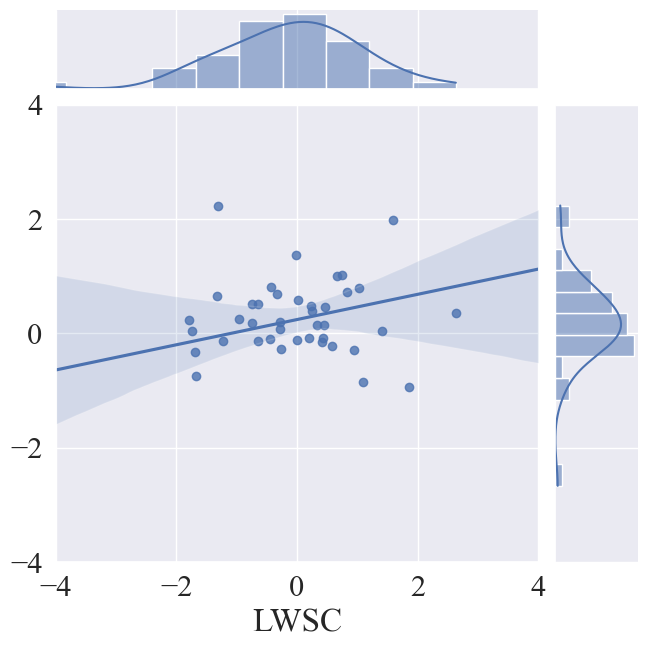

In [5]:

# 绘制预测值与实际值的对比图

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
rc = {'font.sans-serif': ['Times New Roman']}
sns.set(context='notebook', style="darkgrid", font_scale=2, rc=rc)
sns.jointplot(x=y_test, y=y_pred_test, 
                  kind="reg", truncate=False,
                  xlim=(-4, 4), ylim=(-4, 4),
                   height=7)


<Figure size 1000x600 with 0 Axes>

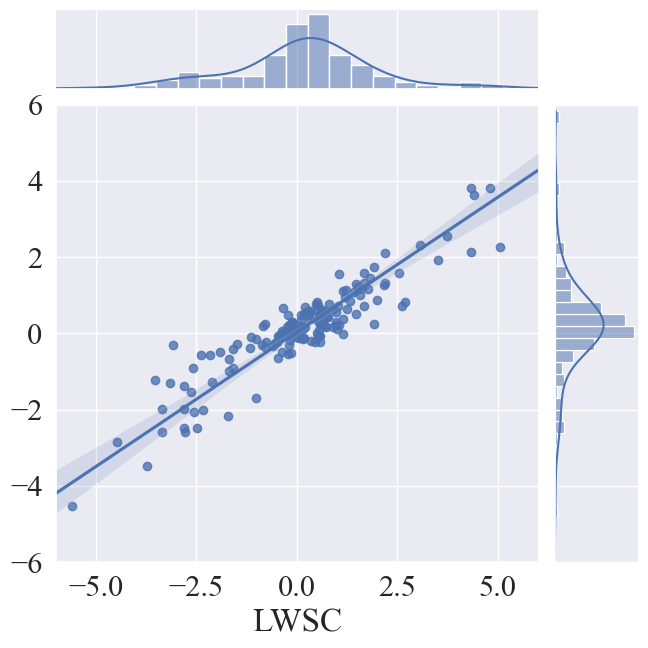

In [6]:



import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(10, 6))
rc = {'font.sans-serif': ['Times New Roman']}
sns.set(context='notebook', style="darkgrid", font_scale=2, rc=rc)
sns.jointplot(x=y_train, y=y_pred_train, 
                  kind="reg", truncate=False,
                  xlim=(-6, 6), ylim=(-6, 6),
                   height=7)
